In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#importing insurance data from excel 
pd.read_excel('insurance.xlsx')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df = pd.read_excel('insurance.xlsx')
#gathering basic averages and max/min to better understand the data

In [12]:
charges_sum = df['charges'].sum()
print(charges_sum)

17755824.990759


In [13]:
charges_avg = charges_sum / len(df['charges'])
print(charges_avg)

13270.422265141257


In [14]:
charges_min = df['charges'].min()
print(charges_min)

1121.8739


In [15]:
charges_max = df['charges'].max()
print(charges_max)

63770.42801


In [16]:
most_expensive_profile = df[df['charges'] == charges_max]

In [17]:
cheapest_profile = df[df['charges'] == charges_min]

In [18]:
#here's what comprises the cheapest possible profile 
cheapest_profile

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739


In [19]:
#here's what comprises the most expensive profile 
most_expensive_profile

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [20]:
#some key difference that can be seen: age, bmi, and smoker status
#lets see which factors cause the largest change in cost 

In [21]:
#smoking analysis 
smokers_chart = df[df['smoker'] == 'yes']

smokers_sum = smokers_chart['charges'].sum()

smokers_avg = smokers_sum / len(smokers_chart['charges'])
print(smokers_avg)


32050.23183153284


In [22]:
non_smokers_chart = df[df['smoker'] == 'no']

non_smokers_sum = non_smokers_chart['charges'].sum()

non_smokers_avg = non_smokers_sum / len(non_smokers_chart['charges'])

print(non_smokers_avg)

8434.268297856204


In [23]:
price_diff = smokers_avg - non_smokers_avg
print(price_diff)

23615.963533676637


In [24]:
percentage_increase_for_smoking = (price_diff/non_smokers_avg) 
print(percentage_increase_for_smoking)

2.800001458298317


In [25]:
#if a person started smoking they would see a 280% increase in their total cost


In [26]:
#Now lets see how BMI effects total cost 
bmi_sum = df['bmi'].sum()
bmi_avg = bmi_sum / len(df['bmi'])
print(bmi_avg)

30.66339686098655


In [27]:
bmi_cost_chart = df.loc[0:, ['bmi', 'charges']]
bmi_cost_chart.sort_values(by = ['bmi'])

,bmi,charges
172,15.960,1694.79640
428,16.815,3167.45585
1226,16.815,6640.54485
412,17.195,14455.64405
1286,17.290,3732.62510
...,...,...
286,48.070,9432.92530
116,49.060,11381.32540
847,50.380,2438.05520
1047,52.580,44501.39820


In [28]:
bmi_cost_sorted_chart = bmi_cost_chart.sort_values(by = ['bmi'])

<AxesSubplot:xlabel='bmi'>

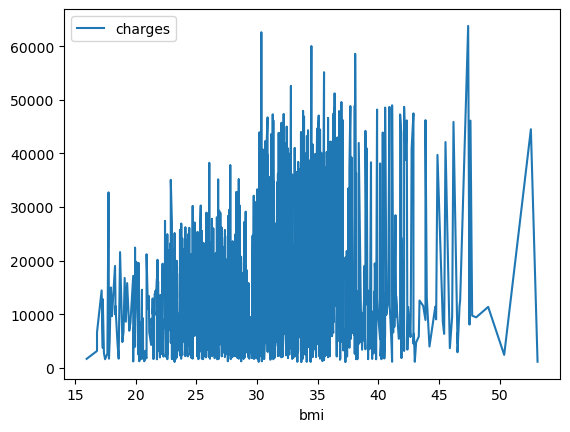

In [29]:
bmi_cost_sorted_chart.plot(y = 'charges', x = 'bmi')

In [30]:
#this graph allows us to see that aicrease in bmi shows a trend of increased charges for insurance 

In [31]:
#now lets inpsect how age affects cost for insurence buyers 

In [35]:
age_cost_chart = df.loc[0:, ['age', 'charges']]

<AxesSubplot:xlabel='age'>

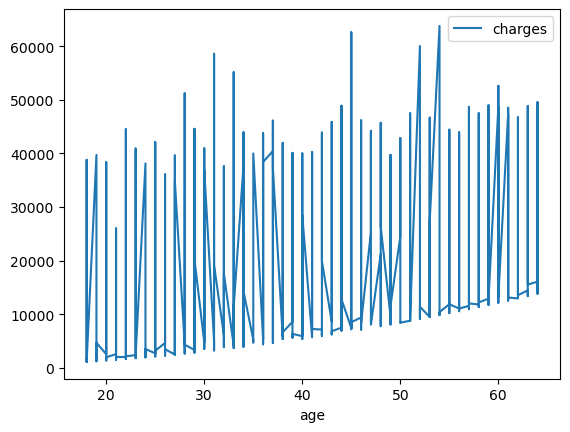

In [39]:
age_cost_chart_sorted = age_cost_chart.sort_values(by = ['age'])
age_cost_chart_sorted.plot(y= 'charges', x='age')

In [3]:
#this chart shows a linear relation between age and cost for users, as age increase, the insurance owner can expect to an increas in total charges 


In [4]:
#it can be determined that the the key drivers in price increase for an insurance buyer are as follows: 1) smokining status, 2) bmi, 3) age 